In [8]:
import pandas as pd
df = pd.read_csv('./data/classification_by_title_and_tags_2017.csv')
print(len(df))
df.head()

10000


,Unnamed: 0,categories,channel_id,crawl_date,description,dislike_count,display_id,duration,like_count,tags,title,upload_date,view_count,year,month,day,text,__index_level_0__,broad_category,broad_confidence
0,150576,Education,UCVJalJNQWimC2zWrIHR_bSQ,2019-11-03 06:23:29.582519,An interview with billionaire entrepreneur and...,2.0,1ECOnSEKiSk,2331,132.0,"Investors Archive,money,education,investing,bu...",Jack Ma: Building Alibaba and its Future (2017),2017-10-03,7205.0,2017,10,3,Jack Ma: Building Alibaba and its Future (2017...,150576,Cryptocurrency,0.096170
1,182689,Education,UCUnFheTbVpASikm0YPb8pSw,2019-11-20 00:12:09.749495,John from http://www.growingyourgreens.com/ an...,35.0,38m6OHI8EJ8,1999,433.0,"cabbage moth,cabbage worm,cabbage moths,cabbag...",How to Get Rid of Cabbage Moths / Worms + More...,2017-12-29,8097.0,2017,12,29,How to Get Rid of Cabbage Moths / Worms + More...,182689,Environment,0.294774
2,367795,Education,UCS3RXL1ICt42KV-EeXSt--A,2019-10-29 20:26:51.335763,What does globetrot mean?\nA spoken definition...,0.0,S9Za_8z24GU,35,0.0,"globetrot,definition,meaning,English,Explanati...",What does globetrot mean?,2017-11-24,4.0,2017,11,24,"What does globetrot mean?globetrot,definition,...",367795,Language,0.292360
3,230790,Education,UCTvl_LGIijXntLQxpQd-IuQ,2019-11-10 10:12:42.895821,Here is a collection of educational videos rel...,6.0,LLI2U3EO2TY,254,321.0,"learning for success,how to study well,how to ...",គន្លឹះ៦យ៉ាងដើម្បីក្លាយជាអ្នកមានជោគជ័យ,2017-04-23,17304.0,2017,4,23,គន្លឹះ៦យ៉ាងដើម្បីក្លាយជាអ្នកមានជោគជ័យlearning ...,230790,History,0.206077
4,176640,Education,UCUsg0kX7FPatpsmtRI1G6Aw,2019-11-19 23:23:46.083533,You can go to https://cardgames.io/triangles/ ...,2.0,QiUtYE0oFFk,195,3.0,"game,howto play,triangles,card,games,board,fun...",How To Play Triangles (Board Game),2017-10-11,684.0,2017,10,11,"How To Play Triangles (Board Game)game,howto p...",176640,Environment,0.474845


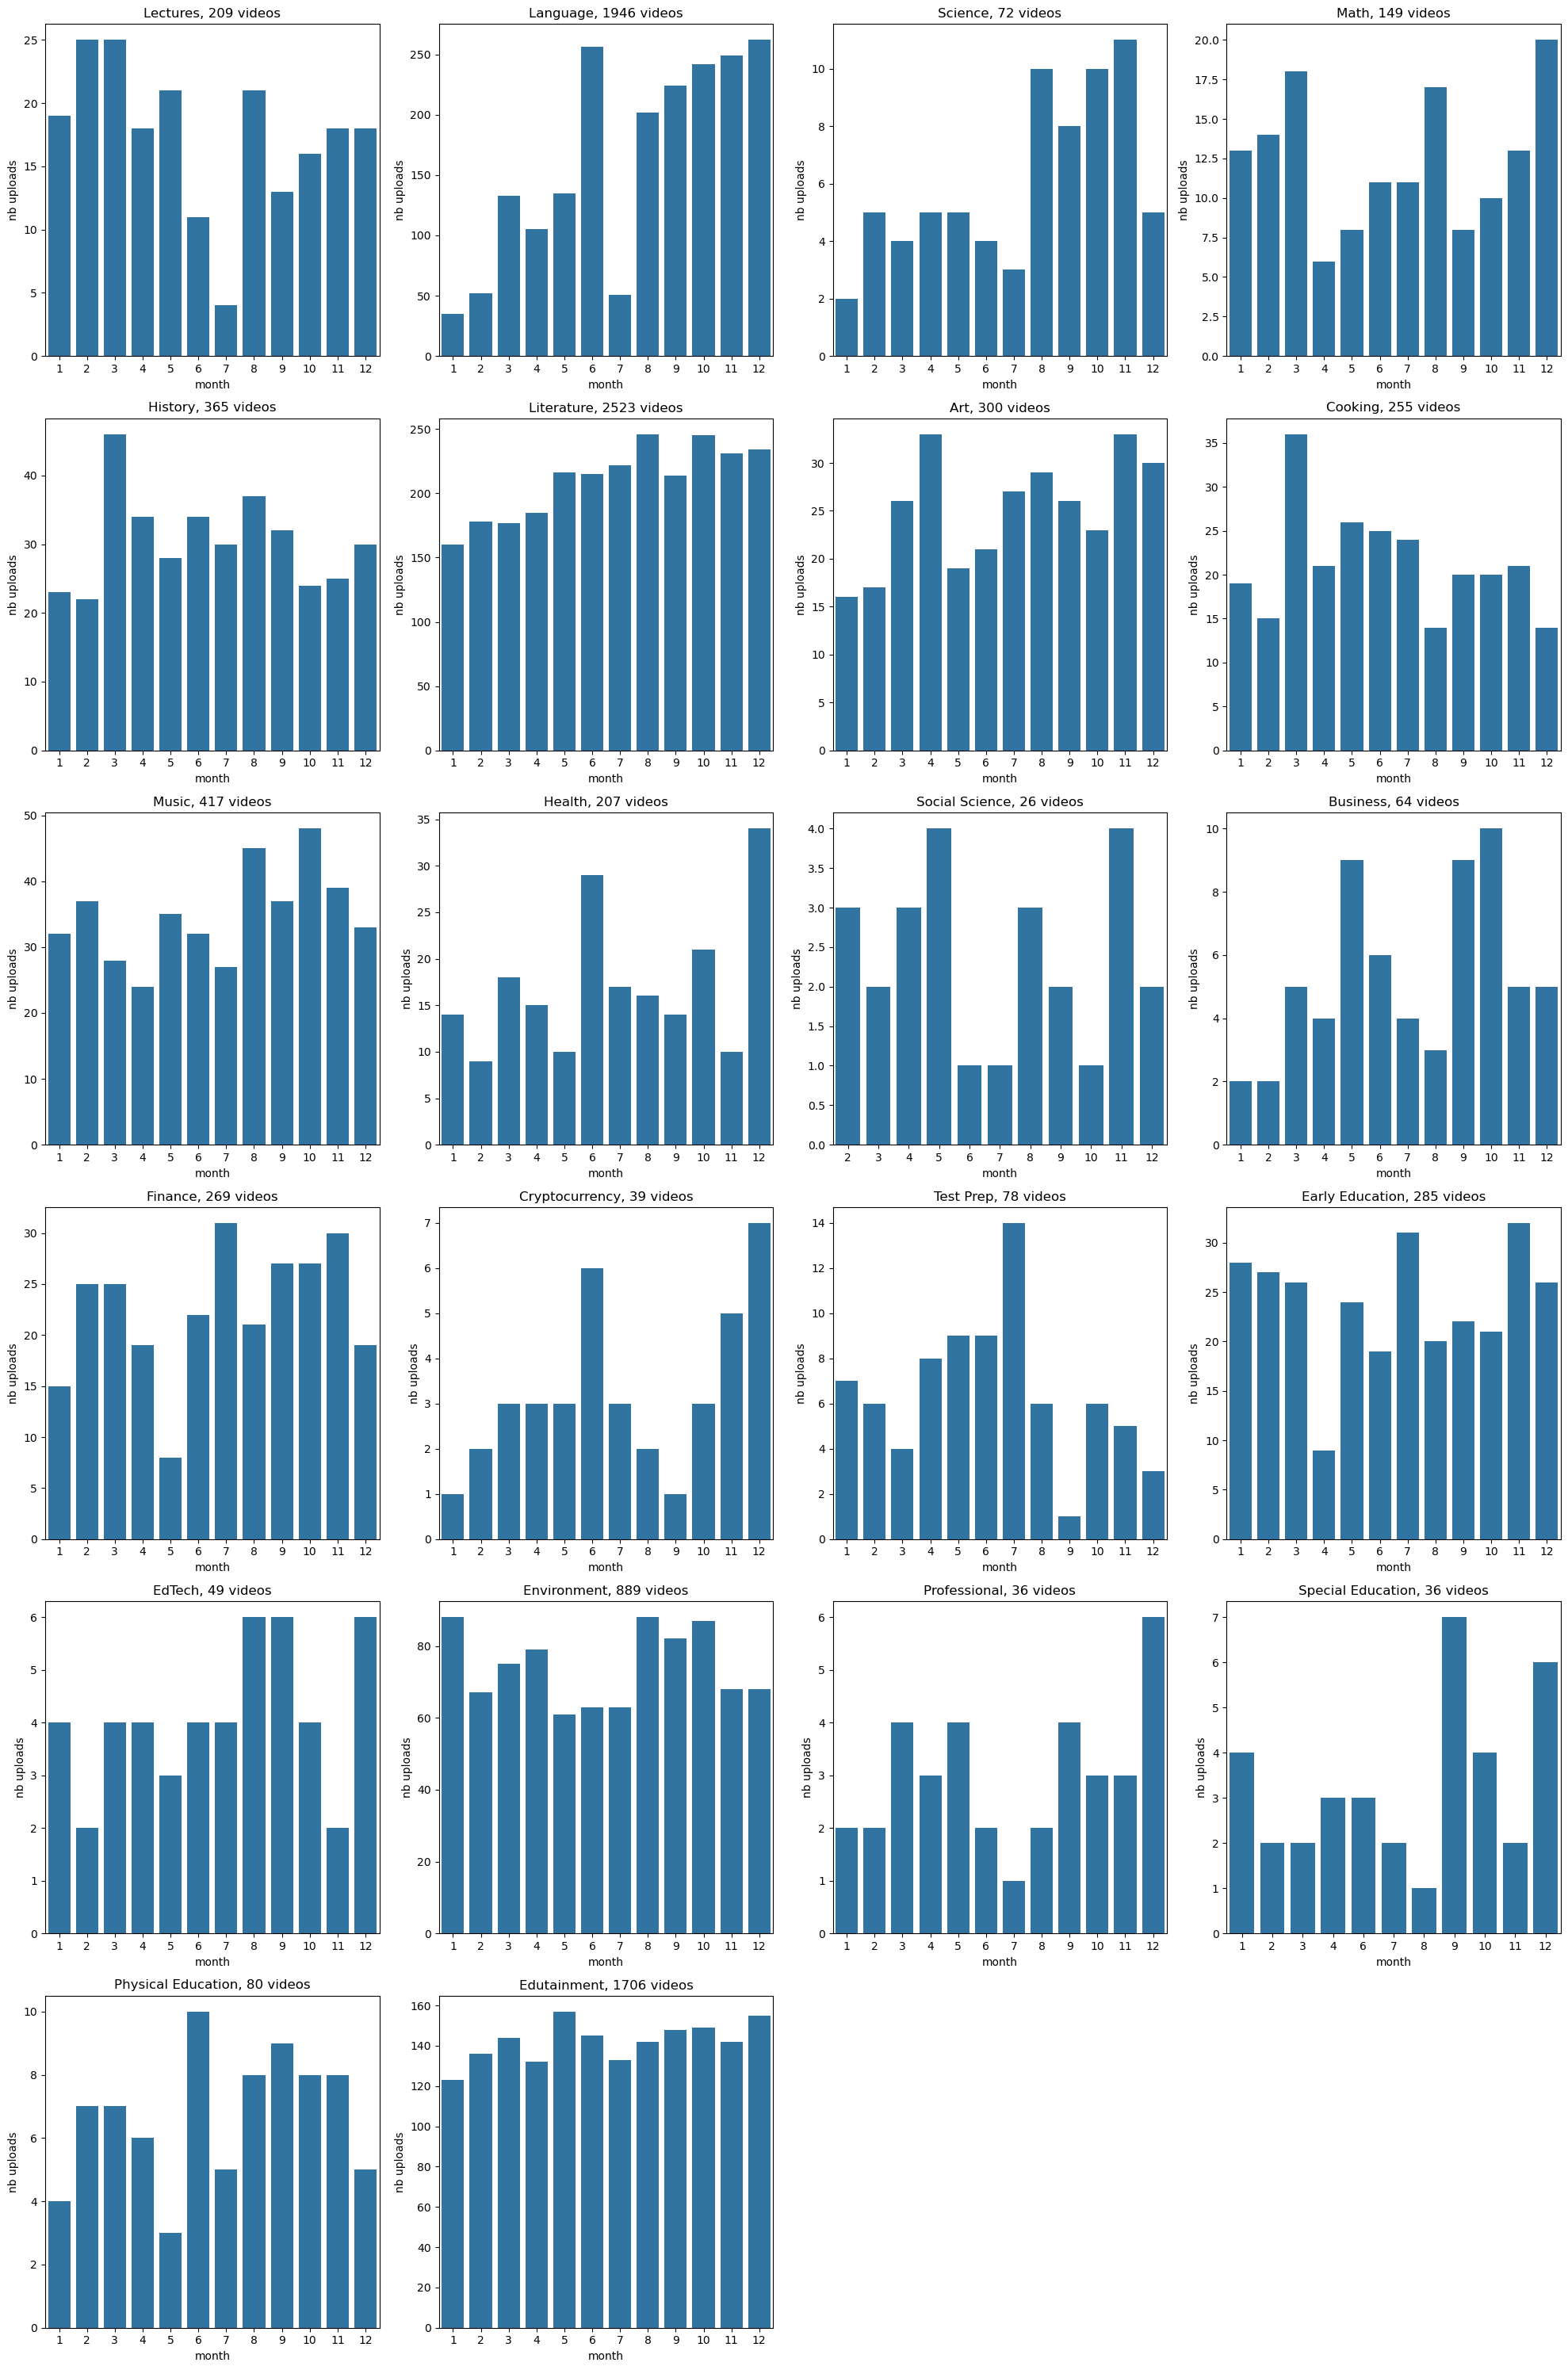

In [61]:
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

with open('categories.json', 'r') as file:
    categories = json.load(file)

categories = list(categories.keys())

nb_columns = 4
nb_rows = int(np.ceil(len(categories) / nb_columns))
fig, ax = plt.subplots(nb_rows, nb_columns, figsize=(5*nb_columns, 5*nb_rows))
ax = ax.flatten()

for i, category in enumerate(categories):
    df_cat = df[df['broad_category'] == category]
    nb_uploads_per_month = df_cat.groupby('month').size().reset_index(name='nb_uploads')
    sns.barplot(data=nb_uploads_per_month, x='month', y='nb_uploads', ax=ax[i])
    ax[i].set_title(f'{category}, {len(df_cat)} videos')
    ax[i].set_xlabel('month')
    ax[i].set_ylabel('nb uploads')

plt.tight_layout()

for j in range(len(categories), nb_columns*nb_rows, 1) :
    plt.delaxes(ax[j])

In [ ]:
# Assign one broad category per channel
channel_cat = df.groupby(['channel_id', 'broad_category']).size().groupby('channel_id').idxmax().apply(lambda x: x[1]).reset_index(name='dominant_category')
channel_cat.head()

,channel_id,dominant_category
0,UCQe7WMyQr5Z3XQs8sIQo2Pw,Edutainment
1,UCQeHcVNo6CPWpgJaqEObrqA,Literature
2,UCQelqb2QFu9EJAZMGN8Rmcg,Literature
3,UCQf3jCaIVZudZ-p5WC1Fc_w,Literature
4,UCQg2AzkYEueS5giD84wxLdg,Language


In [40]:
df_ts_r = pd.read_csv("./data/df_timeseries_en.tsv.gz", compression="infer", sep="\t")
missing_columns = df_ts_r.columns[df_ts_r.isnull().any()]
print('Columns with missing values: ', missing_columns.tolist())
missing_indices = df_ts_r[df_ts_r.isnull().any(axis=1)].index
print(len(missing_indices), 'rows wih missing values')
df_ts = df_ts_r.drop(index=missing_indices)
print('Length after dropping missing values:', len(df_ts_r))
df_ts['datetime'] = pd.to_datetime(df_ts['datetime'])
df_ts['month'] = df_ts['datetime'].dt.month
df_ts['year'] = df_ts['datetime'].dt.year
df_ts['day'] = df_ts['datetime'].dt.day
df_ts.head()

Columns with missing values:  ['category']
20584 rows wih missing values
Length after dropping missing values: 18872499


,channel,category,datetime,views,delta_views,subs,delta_subs,videos,delta_videos,activity,month,year,day
0,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-03,2.024946e+05,0.000000,650.222222,0.000000,5,0,3,7,2017,3
1,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-10,3.940857e+05,191591.111111,1046.000000,395.777778,6,1,1,7,2017,10
2,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-17,8.353938e+05,441308.083333,1501.500000,455.500000,6,0,1,7,2017,17
3,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-24,1.104577e+06,269183.250000,1750.000000,248.500000,6,0,0,7,2017,24
4,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-31,1.284406e+06,179828.600000,2008.300000,258.300000,6,0,0,7,2017,31


72 values


<Axes: xlabel='month', ylabel='delta_subs'>

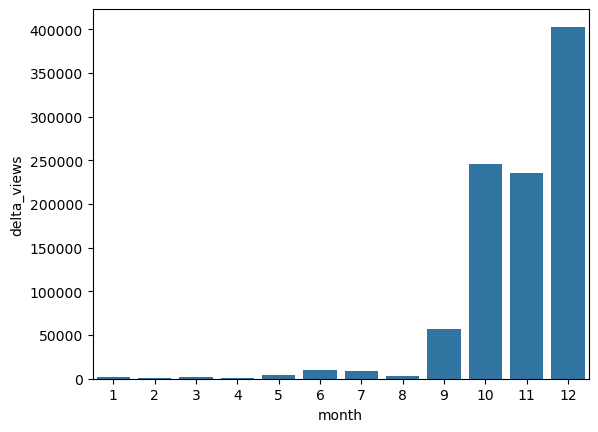

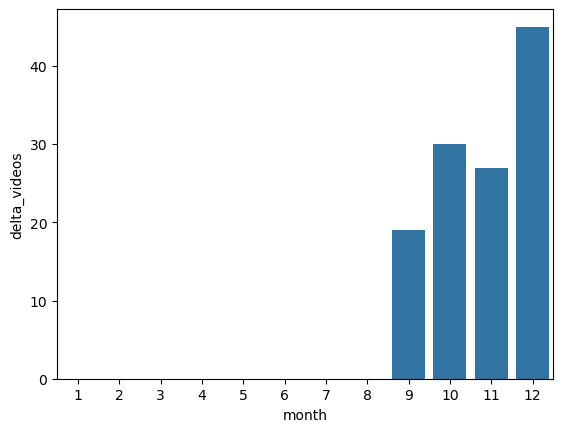

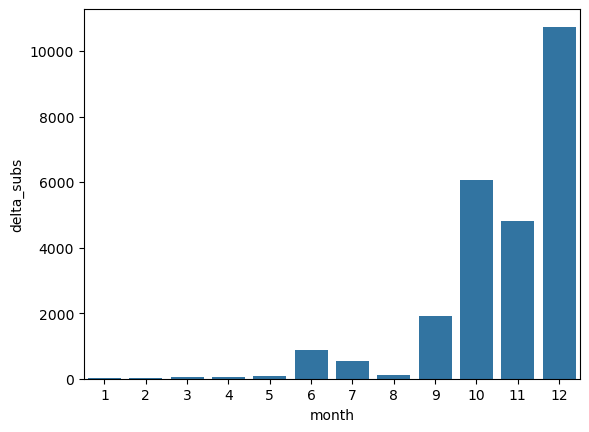

In [72]:
year = 2017
category = 'Cryptocurrency'
channel_lectures = channel_cat[channel_cat['dominant_category'] == category]

df_ts_cat = df_ts[df_ts['channel'].isin(channel_lectures['channel_id'])]
df_ts_cat = df_ts_cat[df_ts_cat['year'] == year]
print(len(df_ts_cat), 'values')

peak_views = df_ts_cat.groupby('month')['delta_views'].sum()
plt.figure()
sns.barplot(peak_views)

peak_videos = df_ts_cat.groupby('month')['delta_videos'].sum()
plt.figure()
sns.barplot(peak_videos)

peak_subs = df_ts_cat.groupby('month')['delta_subs'].sum()
plt.figure()
sns.barplot(peak_subs)

In [19]:
df = pd.read_csv('./data/classification_by_title_and_tags.csv')
df.head()

,Unnamed: 0,categories,channel_id,crawl_date,description,dislike_count,display_id,duration,like_count,tags,title,upload_date,view_count,year,month,day,text,__index_level_0__,broad_category,broad_confidence
0,443345,Education,UCsT0YIqwnpJCM-mx7-gSA4Q,2019-11-02 13:00:50.500291,TEDxRosario se realiza en la ciudad de Rosario...,0.0,UVdc0nsN-Ko,1370,24.0,"electronic waste,toys,education,design,CEC,isl...",Una historia de juguetes: Jorge Crowe at TEDxR...,2013-06-13,1784.0,2013,6,13,Una historia de juguetes: Jorge Crowe at TEDxR...,443345,Literature,0.332202
1,124758,Education,UC2fgc5EQmUVHsPibTlIX7cQ,2019-11-01 13:48:52.185848,Are you Stress Eating and Gaining Weight? Here...,0.0,0htL-qAlnDU,539,10.0,"stress eating and gaining weight,stress eating...",Stress Eating and Gaining Weight - My Story,2018-03-23,392.0,2018,3,23,Stress Eating and Gaining Weight - My Storystr...,124758,Literature,0.891663
2,324320,Education,UCwWeR7z1tDD-SFkWjQrUrQA,2019-11-17 21:59:29.385917,"In this webinar, Professor Grant Ackerman expl...",0.0,zu_FN6bwDcY,3329,0.0,"management essentials,essentials of management...",The Art of Conflict,2016-09-22,224.0,2016,9,22,"The Art of Conflictmanagement essentials,essen...",324320,Art,0.946580
3,305248,Education,UC-lUDsUcjn1H1zU8y6gdtRQ,2019-11-04 13:40:22.518865,Source Video - https://youtu.be/lbIlXz1neik\n\...,2.0,sgvfhP14REM,1636,29.0,VAN MORRISON Till We Get The Healing Done Reac...,VAN MORRISON Till We Get The Healing Done Reac...,2019-07-01,703.0,2019,7,1,VAN MORRISON Till We Get The Healing Done Reac...,305248,Health,0.091137
4,307636,Education,UCEHPs560RHUcsD0modg-lSA,2019-11-10 07:40:47.906337,http://homesteadadvisor.com/\nThis is one of t...,21.0,bqj2aDuwde4,287,143.0,"mulching around fruit trees,mulching fruit tre...",Mulching Around Fruit Trees,2013-07-09,32863.0,2013,7,9,Mulching Around Fruit Treesmulching around fru...,307636,Environment,0.186210


In [20]:
from utils import create_channels_cat
channels_cat = create_channels_cat(df)
channels_cat.head()

,channel_id,categories,weights
0,UC--MxpGXJ3LVD8KvlNzRlcA,[Edutainment],[1.0]
1,UC--e1G28Uhx1XL4na8uxIhA,[Edutainment],[1.0]
2,UC-0d3muMfcERwnqn7CEIW-A,"[Edutainment, Language, Environment]","[0.4, 0.4, 0.2]"
3,UC-0glaRVSX-yzC-0kj4k-rA,"[Language, Edutainment, Literature]","[0.6, 0.2, 0.2]"
4,UC-1eZ9zR6PhB2PMbmh1KT-Q,[Environment],[1.0]
